# Naive Bayes

Naive Bayes is a classification algorithm based on Bayes' theorem. Bayes’ theorem provides a way to calculate the probability of a data point belonging to a given class, given our prior knowledge. It is defined as

$$
\mathbb P (class|data) = \frac{\mathbb P (data|class) \ \mathbb P (class)}{\mathbb P (data)} ,
$$

where $\mathbb P (class | data)$ is the probability over the potential classes given the provided data. The different probabilities $\mathbb P$ you see in the equations above are commonly called prior, likelihood, evidence, and posterior as follows.

$$
\overbrace{\mathbb P (class|data)}^{\text{posterior}} = \frac{\overbrace{\mathbb P (data|class)}^{\text{likelihood}} \ \overbrace{\mathbb P (class)}^{\text{prior}}}{\underbrace{\mathbb P (data)}_{\text{evidence}}}
$$

The algorithm is 'naive', because of its assumption that features of data are independent given the class label. Let us call the data features $x_1, \dots, x_i, \dots, x_n$ and the class label $y$, and rewrite Bayes theorem in these terms:

$$
\mathbb P (y|x_1, \dots, x_n) = \frac{\mathbb P (x_1, \dots, x_n|y) * \mathbb P (y)}{\mathbb P (x_1, \dots, x_n)} \, . 
$$

Then, the naive assumption of conditional independence between any two features given the class label can be expressed as

$$
\mathbb P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = \mathbb P (x_i | y) \, .
$$

For all $i$, we can simply Bayes' theorem to:

$$
\mathbb P (y | x_1, \dots, x_n) = \frac{\mathbb P (y) \prod_{i=1}^n \mathbb P(x_i | y)}{\mathbb P (x_1, \dots, x_n)} \, .
$$

Since $\mathbb P (x_1, \dots, x_n)$ is the constant input, we can define the following proportional relationship

$$
\mathbb P (y|x_1, \dots, x_n) \propto \mathbb P (y) \prod_{i=1}^n \mathbb P(x_i | y) \, ,
$$

and can use it to classify any data point as

$$
\hat y = \underset{y}{\text{arg max}} \ \mathbb P (y) \prod_{i=1}^n \mathbb P(x_i | y) \, .
$$

To learn how this algorithm works in practice, we define a simple data set of emails being either spam or not (adopted from Chapter 3.5, Exercise 3.22 in Machine Learning: A Probabilistic Perspective by Murphy). _Note that Naive Bayes can indeed be used for multiclass classification, however we use it here as a binary classifier._ 

We will work with the packages numpy and pandas, but also make our lives a bit easier with sklearn's implemented feature extractor to count words and its validation module to check whether data arrives in the format we need it.

In [1]:
import numpy as np
import pandas as pd
from typing import Callable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.validation import check_X_y, check_array

In [2]:
def make_spam_dataset(show_X=True):
    """ Create a small toy dataset for MultinomialNB implementation
    
    Returns:
        X: word count matrix
        y: indicator of whether or not message is spam
        msg_tx_func: a function to transform new test data into word count matrix
    """

    vocab = [
        'secret', 'offer', 'low', 'price', 'valued', 'customer', 'today',
        'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza'
    ]

    spam = [
        'million dollar offer',
        'secret offer today',
        'secret is secret'
    ]
    
    not_spam = [
        'low price for valued customer',
        'play secret sports today',
        'sports is healthy',
        'low price pizza'
    ]

    all_messages = spam + not_spam
    
    vectorizer = CountVectorizer(vocabulary=vocab)
    word_counts = vectorizer.fit_transform(all_messages).toarray()
    df = pd.DataFrame(word_counts, columns=vocab)
    is_spam = [1] * len(spam) + [0] * len(not_spam)  
    # storing our labels in a list (1 means spam email, 0 means no spam email)
    msg_tx_func = lambda x: vectorizer.transform(x).toarray()
    
    if show_X:
        display(df)
        
    return df.to_numpy(), np.array(is_spam), msg_tx_func

In [3]:
# define our variables and print X
X, y, tx_func = make_spam_dataset(show_X=True)

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# see how y looks like
print(y)

[1 1 1 0 0 0 0]


Next, we train the Naive Bayes classifier with a `train` function where we define the prior. Recall from our lectures that the prior is the probability distribution incorporating our knowledge of the data. Consequently, we use the available training set to define it. We do the first step for you to separate the training examples of both classes, but you need to define the binomial probability distribution.



In [5]:
# EDIT THIS FUNCTION - DONE
def train(X, y):
  """ Use training data for Naive Bayes classifier """

  # not strictly necessary, but this ensures we have clean input
  X, y = check_X_y(X, y)
  n = X.shape[0]

  # reorder X as a 2-dimensional array; each dimension contains data examples of only one of our two classes
  X_by_class = np.array([X[y==c] for c in np.unique(y)], dtype=object)
  # define prior
  ## EDIT THIS LINE BELOW (hint: use python's list comprehension) - DONE
  prior = np.array([len(X_class) / len (y) for X_class in X_by_class])

  # count words in each class
  word_counts = np.array([sub_arr.sum(axis=0) for sub_arr in X_by_class])
  # define likelihood
  lk_word = word_counts / word_counts.sum(axis=1).reshape(-1, 1)

  return prior, lk_word

In [6]:
# call function and print prior
prior, lk_word = train(X, y)
print('Prior:', prior)

Prior: [0.57142857 0.42857143]


#### Questions:
1. Do you understand what these two values stand for? 
- The frequency of each class (spam or not spam) in the training set
2. Plot them as a Bernoulli distribution and explain where the difference comes from.
- below

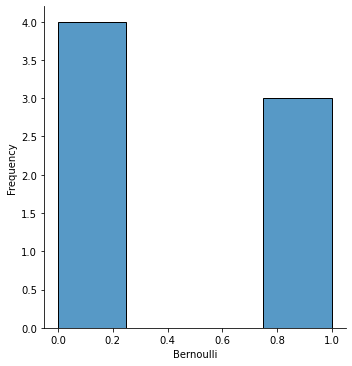

In [7]:
# import bernoulli and seaborn
from scipy.stats import bernoulli
import seaborn as sns
ax= sns.displot(y)
ax.set(xlabel='Bernoulli', ylabel='Frequency')

Now we can predict whether any given email is spam or not. Let us define first a function that computes the posterior and afterwards a second function that predicts the binary classification.

_Hint: If the following cell includes too many and too complicated steps at once, print the output of each variable one line after the other._

In [16]:
# EDIT THIS FUNCTION - DONE
def predict_proba(X, y, test_X):
  """ Predict probability of class """

  X = check_array(X)
  X, y = check_X_y(X, y)

  # insert train function within this function
  prior, lk_word = train(X, y)

  # loop over each observation to calculate conditional probabilities
  class_numerators = np.zeros(shape=(test_X.shape[0], prior.shape[0]))
  for i, x in enumerate(test_X):
    
    # count how often words appear in each email
    word_exists = x.astype(bool)
    #print(word_exists)
    
    # compute likelihoods of words (probability of data appearing in any class)
    lk_words_present = lk_word[:, word_exists] ** x[word_exists]
    #print(lk_words_present)
    
    # compute likelihood of entire message with likelihoods of words
    lk_message = (lk_words_present).prod(axis=1)
    #print(lk_message)
    
    # combine likelihood and prior to numerator
    class_numerators[i] = lk_message * prior  ## <-- EDIT THIS LINE - DONE

  normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
  posteriors = class_numerators / normalize_term
  if not (posteriors.sum(axis=1) - 1 < 0.0001).all():
    print(posteriors)
    raise ValueError('Rows should sum to 1')
  return posteriors

In [17]:
posteriors = predict_proba(X, y, X)

Now, we can predict in a binary fashion by asserting any data points to the class with the highest probability. Here, we take our emails we trained our Naive Bayes classifier on also to evaluate it, but the evaluation normally happens on unseen emails.

In [18]:
def predict(X, y, test_X):
  """ Predict class with highest probability """
  return predict_proba(X, y, test_X).argmax(axis=1)

In [19]:
preds = predict(X, y, X)
print(preds)
print(f'Accuracy: {(preds==y).mean()}')

[1 1 1 0 0 0 0]
Accuracy: 1.0


#### Questions:
1. Define your own three short emails as a test set and evaluate our Naive Bayes classifier on it without re-training it on them. What do you observe? 
- accuracy is no longer 100%
2. What words have you included in emails of the test set that make them being classified as spam or not spam?
- swapped some of the words previously used in spam / non-spam emails

In [86]:
def make_test_dataset(show_X=True):
    """ Create a small test dataset of emails
    Returns:
        X: word count matrix
        y: indicator of whether or not message is spam
        msg_tx_func: a function to transform new test data into word count matrix
    """

    vocab = [
        'secret', 'offer', 'low', 'price', 'valued', 'customer', 'today',
        'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza'
    ]

    
    spam = [
        'secret million dollar offer today',
        'pizza is healthy secret'
    ]
    
    not_spam = [
        'low price for today'
    ]
    
    
    
    all_messages = spam + not_spam
    
    vectorizer = CountVectorizer(vocabulary=vocab)
    word_counts = vectorizer.fit_transform(all_messages).toarray()
    df = pd.DataFrame(word_counts, columns=vocab)
    is_spam = [1] * len(spam) + [0] * len(not_spam)  
    # storing our labels in a list (1 means spam email, 0 means no spam email)    
    if show_X:
        display(df)
        
    return df.to_numpy(), np.array(is_spam)

In [87]:
# define our test variables and print test_X and test_y
test_X, test_y = make_test_dataset(show_X=True)
print(test_y)

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0


[1 1 0]


In [85]:
preds = predict(X, y, test_X)
print(preds)
print(f'Accuracy: {(preds==test_y).mean()}')

[1 0 0]
Accuracy: 0.6666666666666666
